#Set up

##Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

## Loading the dataset

Dataset is loaded directly from drive to colab.

In [123]:
!gdown 1zC91edHnANnmtoQ357OsX2qvAxuR-u_R

Downloading...
From: https://drive.google.com/uc?id=1zC91edHnANnmtoQ357OsX2qvAxuR-u_R
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 43.0MB/s]


In [124]:
df = pd.read_csv('diabetes.csv')
df.head(20)
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


##Remove Outcome

##Data analysis

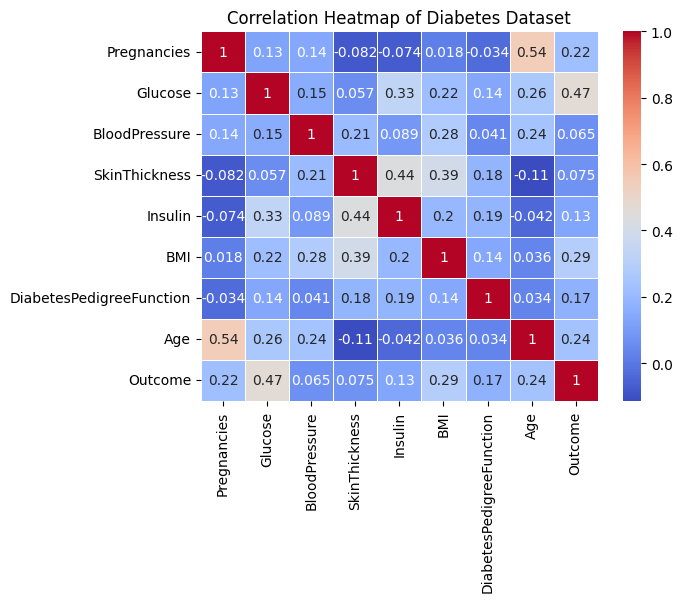

In [125]:
# [Correlation heatmap should be here]
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

###Features Distribution

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

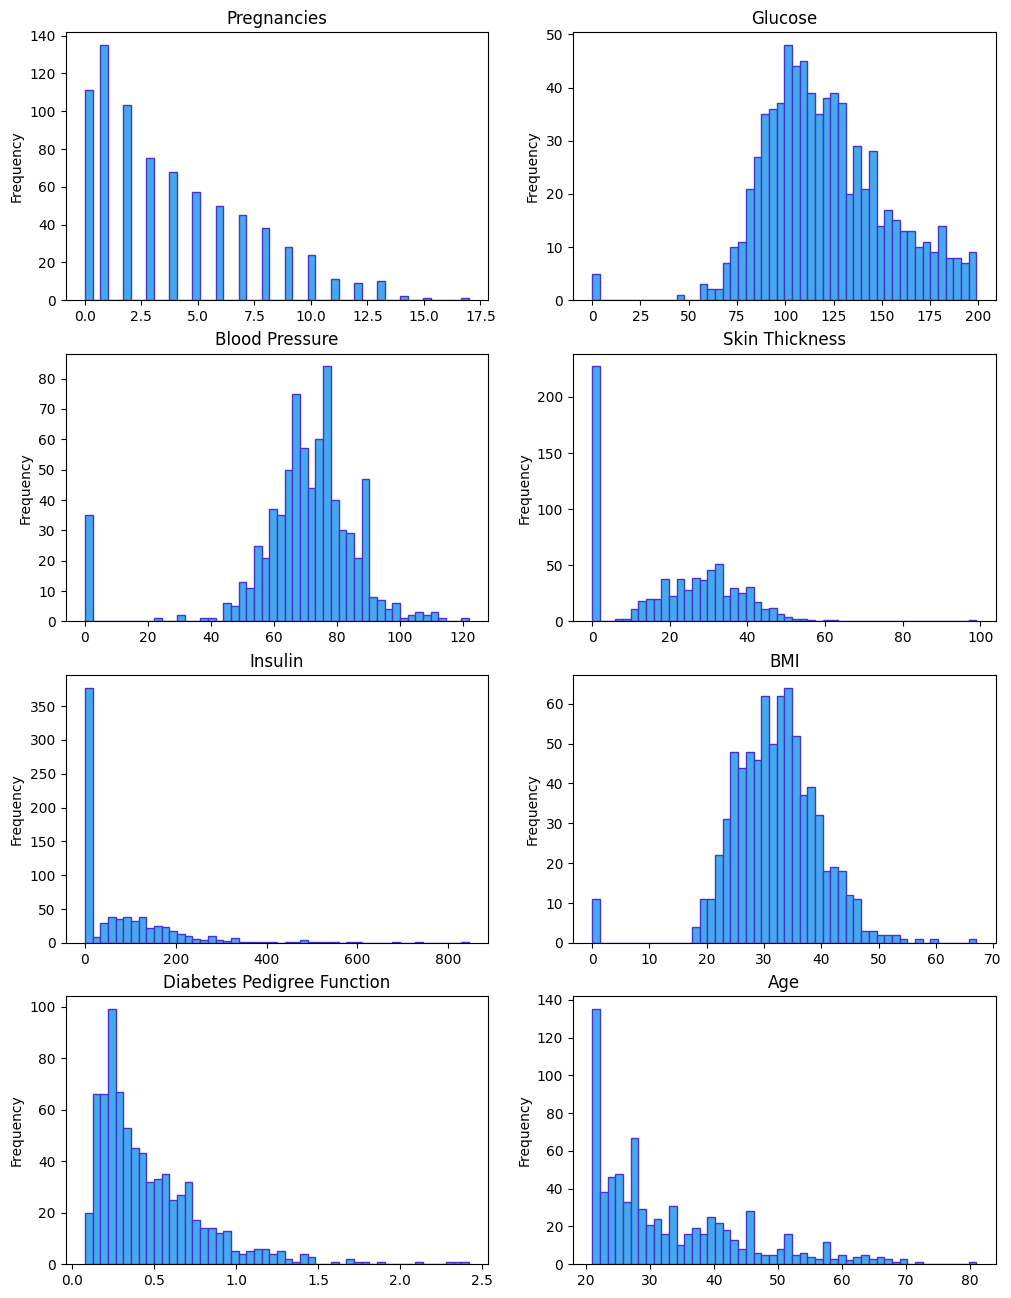

In [126]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Plotting the features of our dataset
df['Pregnancies'].plot(kind='hist', bins=50, title='Pregnancies', ax=axs[0,0], color='#44aaee', edgecolor='#4a32cd')
df['Glucose'].plot(kind='hist', bins=50, title='Glucose', ax=axs[0,1], color='#44aaee', edgecolor='#4a32cd')
df['BloodPressure'].plot(kind='hist', bins=50, title='Blood Pressure', ax=axs[1,0], color='#44aaee', edgecolor='#4a32cd')
df['SkinThickness'].plot(kind='hist', bins=50, title='Skin Thickness', ax=axs[1,1], color='#44aaee', edgecolor='#4a32cd')
df['Insulin'].plot(kind='hist', bins=50, title='Insulin', ax=axs[2,0], color='#44aaee', edgecolor='#4a32cd')
df['BMI'].plot(kind='hist', bins=50, title='BMI', ax=axs[2,1], color='#44aaee', edgecolor='#4a32cd')
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=50, title='Diabetes Pedigree Function', ax=axs[3,0], color='#44aaee', edgecolor='#4a32cd')
df['Age'].plot(kind='hist', bins=50, title='Age', ax=axs[3,1], color='#44aaee', edgecolor='#4a32cd')

###Balance

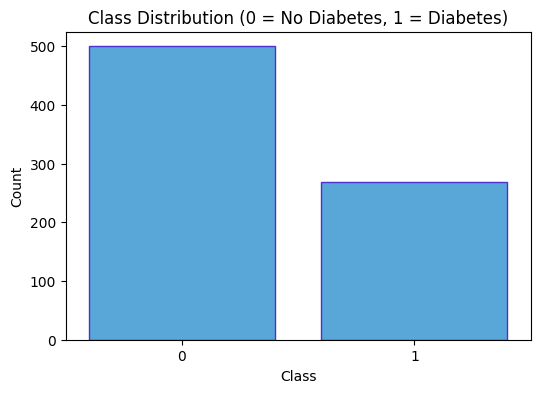

Outcome
0    500
1    268
Name: count, dtype: int64


In [127]:
# Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df, color='#44aaee', edgecolor='#4a32cd')
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

print(df['Outcome'].value_counts())

#Classification

In [128]:
X = df.drop(['Outcome','BloodPressure', 'SkinThickness', 'Insulin'], axis=1)
Y = df['Outcome']

Train-Test Split:

In [129]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Standardize:

In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Decision Tree

Decision Tree Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



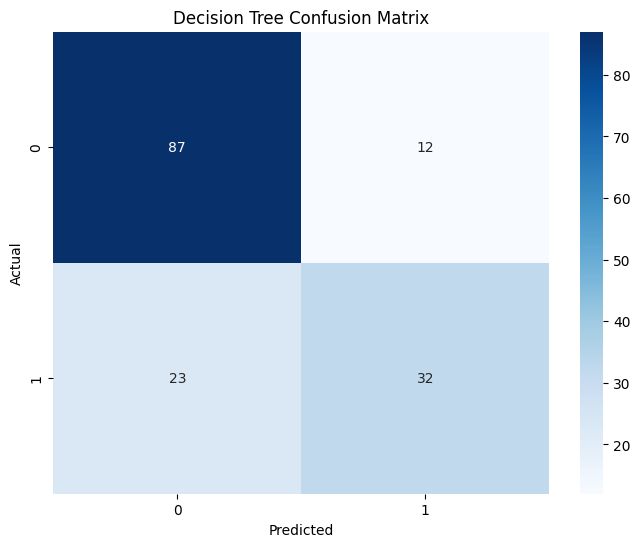

In [131]:
dt_model = DecisionTreeClassifier(criterion="gini",splitter = "best", max_depth = 2, min_samples_split = 100, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Naive Bayes

Naive Bayes Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



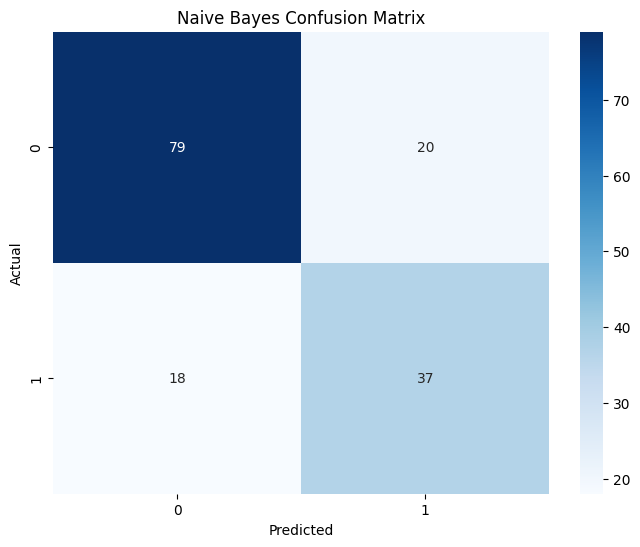

In [132]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##SVM

SVM Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



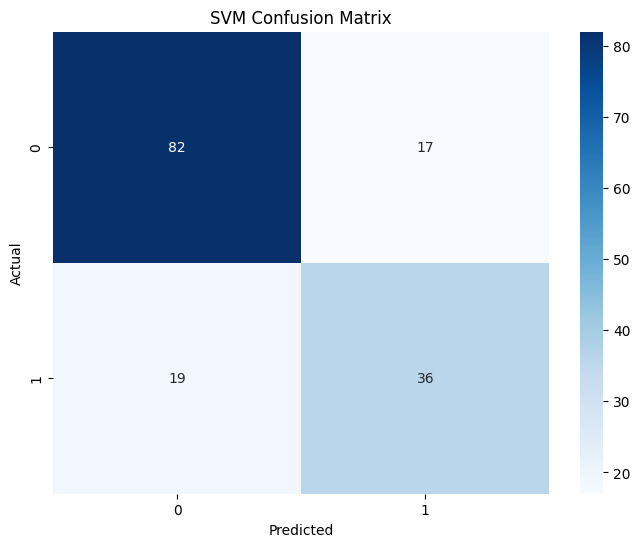

In [133]:
svm_model = SVC(kernel='linear', C=100.0, probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##LDA

LDA Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



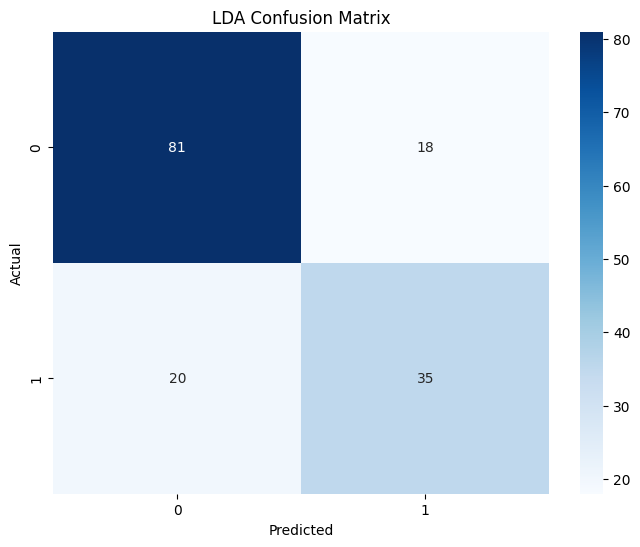

In [134]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##Random Forest

Random Forest Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154



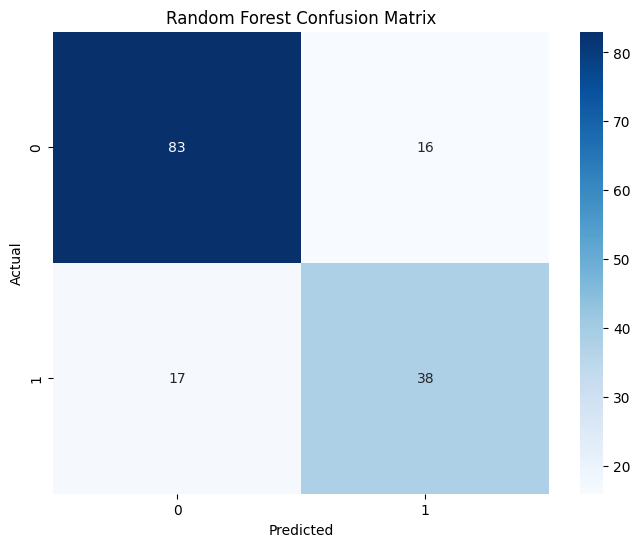

In [135]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Logistic Regression

Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



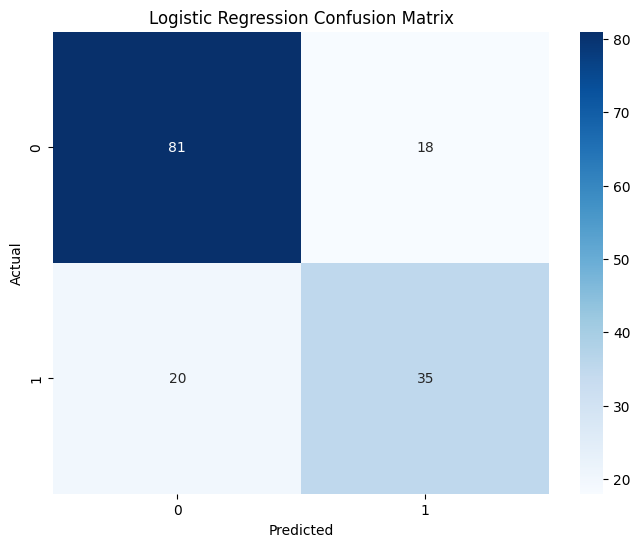

In [136]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Ensemble (Bagging) Classifier

Bagging (Ensemble) Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        99
           1       0.66      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



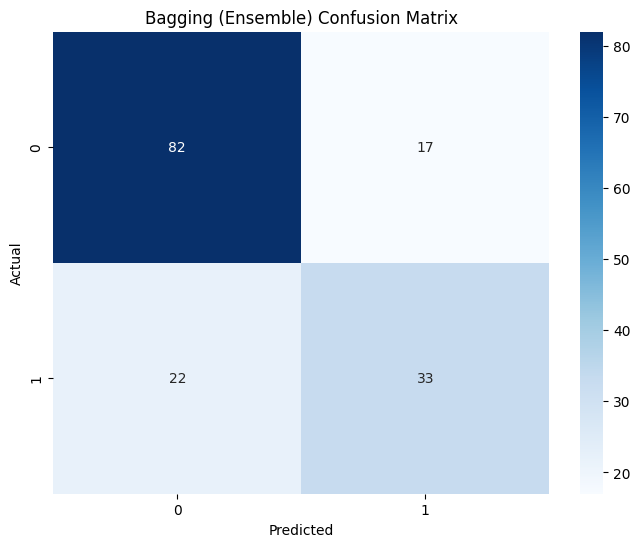

In [137]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging (Ensemble) Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))
cm = confusion_matrix(y_test, y_pred_bagging)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging (Ensemble) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Comparison

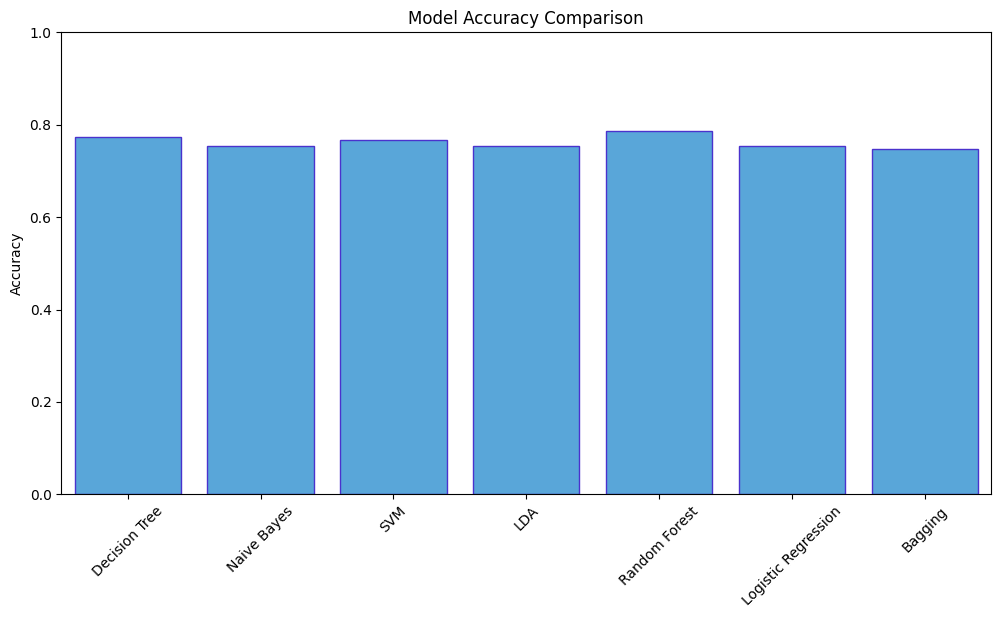

In [139]:
from re import A
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'LDA', 'Random Forest', 'Logistic Regression', 'Bagging']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_lda),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_bagging)
]
plt.figure(figsize=(12,6))
sns.barplot(x=models, y=accuracies, color='#44aaee', edgecolor='#4a32cd')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()